# Исследование объявлений о продаже квартир

## Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План

#### 1. Открытие файла с данными и изучение общей информации

#### 2. Предобработка данных
* Найду и изучу пропущенные значения в столбцах
* Определю, в каких столбцах есть пропуски
* Заполню пропущенные значения там
* Преобразую тип данных в столбцах
* Изучу уникальные значения в столбце с названиями и устраним неявные дубликаты.
* Изучу аномалии и избавимся от них

#### 3. Добавление  новых столбцов в таблицу

#### 4. Исследовательский анализ данных:
* Построю гистограммы
* Изучу, как быстро продавались квартиры (посчитаем среднее и медиану)
* Изучу, какие факторы больше всего влияют на общую (полную) стоимость объекта
* Построю графики корреляции цены от выявленных параметров
* Посчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделю населённые пункты с самой высокой и низкой стоимостью квадратного метра

#### 5. Вывод

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('./datasets/real_estate_data.csv', sep = '\t')

In [3]:
pd.set_option('display.max_columns', 50) 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.duplicated().sum() #проверим наличие дубликатов

0

В данных присутствуют многочисленные пропуски, их будем заполнять на следующем этапе. Дубликатов нет. Есть аномалии в данных по количеству комнат: где то стоит 0, и стоит проверить квартиру с максимальным количеством-19. Также, есть аномалии в данных, отражающих высоту потолков(100 м). Тип данных необходимо поменять на int

## Предобработка данных

In [7]:
data.isna().sum() #посчитаем кол-во пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
#переименуем столбец 
data.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace=True)

In [9]:
#для удобства дальнейшего вычисления переведем цену в тыс. руб.
data['last_price'] = data['last_price']/1000
data['last_price'].describe()

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64

In [10]:
data.query('last_price > 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000.00,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.00,2,NaN,False,False,50.00,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000.00,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.00,3,NaN,False,False,63.00,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1188,20,118000.00,290.6,2018-06-01T00:00:00,6,3.82,6.0,188.70,3,NaN,False,False,22.00,1.0,Санкт-Петербург,25309.0,6224.0,1.0,217.0,0.0,NaN,316.0
1300,14,120000.00,280.0,2018-07-12T00:00:00,5,4.70,4.0,162.00,3,NaN,False,False,30.00,NaN,Санкт-Петербург,24680.0,4247.0,1.0,464.0,3.0,339.0,225.0
1436,19,330000.00,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,NaN,False,False,40.00,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
1928,11,125000.00,224.5,2017-01-24T00:00:00,4,NaN,4.0,163.50,3,False,False,False,30.00,1.0,Санкт-Петербург,22805.0,2335.0,0.0,NaN,2.0,497.0,174.0
2243,9,130278.28,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,NaN,False,False,NaN,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
2536,16,159984.00,242.4,2015-08-27T00:00:00,4,3.85,9.0,131.00,7,NaN,False,False,20.00,0.0,Санкт-Петербург,21946.0,2242.0,1.0,679.0,1.0,227.0,501.0
3117,19,140000.00,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,False,False,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4996,20,124000.00,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.20,2,False,False,False,20.00,NaN,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0


In [11]:
#Отбросим данные с незначительным кол-вом пропусков: locality_name, floors_total, а также данные с данными по жилой площади, т.к. мы не можем достоверно указать корректные данные:
data.dropna(subset=['locality_name', 'floors_total', 'living_area'], inplace=True)

In [12]:
#заполним высоту потолков медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [13]:
#проверим данные квартир с большим количеством комнат
data.query('rooms > 8') #очевидных аномалий не выявлено. У квартир с большим кол-вом комнат достоточно большая площадь

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,False,False,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000.0,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,False,False,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8822,14,49968.9,398.0,2017-07-12T00:00:00,9,3.00,2.0,160.1,1,False,False,False,41.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0
9550,10,23500.0,313.0,2017-02-13T00:00:00,9,3.20,6.0,179.2,5,NaN,False,False,13.2,NaN,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN
9688,8,33000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,False,False,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
13019,0,22250.0,249.9,2019-04-23T00:00:00,9,3.20,5.0,157.0,5,NaN,False,False,12.4,NaN,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN
13397,14,19500.0,309.7,2016-02-03T00:00:00,9,2.65,5.0,199.0,5,NaN,False,False,14.3,0.0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,468.0
14498,6,32250.0,374.6,2018-06-09T00:00:00,19,2.65,5.0,264.5,2,NaN,False,False,27.6,NaN,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


In [14]:
#меняем значения комнат с 0 до 1
data.loc[(data['rooms'] == 0), 'rooms'] = 1

In [15]:
#примем пропущенные значения в колонке с балконами за отсутсвие балкона
data['balcony'] = data['balcony'].fillna(0)

In [16]:
#примем допущение, что при необходимости тип "апартаменты" был указан, пропущенные значения заполним False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [17]:
#рассмотрим подробнее значения населенных пунктов. Есть неявные дубликаты в названиях
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [18]:
#приводим все значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [19]:
# узнаем кол-во уникальных значений в названиях населенных пунктов
data['locality_name'].nunique()

348

In [20]:
#функция для замены неявных дубликатов
def replace_dup(name):
    if name.split()[0] in ['поселок', 'посёлок', 'село']:
        return 'поселок ' + name.split()[-1]
    return name

In [21]:
data['locality_name'] = data['locality_name'].apply(replace_dup)

In [22]:
data['locality_name'].nunique() #заменили дубикаты, нас. пунктов стало меньше

308

In [23]:
#функция для заполенения пропусков исходя из медианы по населенному пункту 
def func_fill (data,name):
    data[name] = data[name].fillna(data.groupby('locality_name')[name].transform("median"))
    return data

In [24]:
#заполним медианным значением наличие и расстояние до ближайших инфраструктурных объектов исходя из нас пункта.
columns_to_fill=['airports_nearest','citycenters_nearest','parks_around3000','parks_nearest','ponds_nearest','ponds_around3000']
for row in columns_to_fill:
    data = func_fill(data,row)

In [25]:
data.isna().sum() #Проверяем пропуски. Пропуски в значениях по объектам инфраструктуры остались, но достоверно мы их не можем заполнить

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             795
balcony                    0
locality_name              0
airports_nearest        4832
citycenters_nearest     4832
parks_around3000        4832
parks_nearest           5337
ponds_around3000        4832
ponds_nearest           4908
days_exposition         2976
dtype: int64

In [26]:
#осталось немного пропущенных значений площади кухни. Их необходимо либо удалить, либо указать в зависимости от площади квартиры. Посмотрим корреляцтю этих факторов
data['kitchen_area'].corr(data['living_area'])

0.42890931447034364

In [27]:
#корреляция низкая, было принято решение удалить строки с пропущенным значением площади кухни 
data.dropna(subset=['kitchen_area'], inplace=True)

In [28]:
data['rooms'].describe()

count    20905.000000
mean         2.095288
std          1.064783
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Присутсвуют аномалии в значениях комнат. Есть квартиры с 0 комнат и с 19 

In [29]:
#переведем столбец с датой в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [30]:
#меняет типы данных на int32
columns_name=['balcony','last_price','floors_total','days_exposition','ponds_nearest','ponds_around3000',
             'parks_nearest','parks_around3000','citycenters_nearest','airports_nearest']
def func_to_int(data,name):
    data[name] = data.loc[data[name].notna(),name].astype('Int32',errors='ignore')
    return data
for row in columns_name:
    data = func_to_int(data,row)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863,16028,1,482.0,2,755.0,NaN
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817,18603,0,NaN,0,587.0,81.0
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741,13933,1,90.0,2,574.0,558.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856,8098,2,112.0,1,48.0,121.0
5,10,2890.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок янино-1,<NA>,<NA>,<NA>,NaN,<NA>,NaN,55.0


Остались пропуски в значениях, которые не можем указать достоверно, однако, значения важны для достоверности выборки. 

## Посчитайте и добавьте в таблицу новые столбцы

In [31]:
#Добавим столбец с ценой за квадратный метр
data['price_per_meter'] = (data['last_price']/data['total_area'])

In [32]:
#функция для классификации этажей расположения квартир
def floor_typing(floor,floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [33]:
#методом apply передадим данные столбцов в нашу функцию floor_table
data['floor_type'] = data.apply(lambda x: floor_typing(x.floor, x.floors_total), axis=1)

In [34]:
#Создадим столбцы соотношения жилой площади к общей площади и площади кухни к общей площади
data['ratio_area'] = data['living_area']/data['total_area']
data['ratio_kitchen'] = data['kitchen_area']/data['total_area']

In [35]:
#день недели, месяц и год публикаци
data['weekday'] = data['first_day_exposition'].dt.weekday
data['published_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['published_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_type,ratio_area,ratio_kitchen,weekday,published_month,published_year
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863,16028,1,482.0,2,755.0,NaN,120.370370,другой,0.472222,0.231481,3,3,2019
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817,18603,0,NaN,0,587.0,81.0,82.920792,первый,0.460396,0.272277,1,12,2018
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741,13933,1,90.0,2,574.0,558.0,92.785714,другой,0.612500,0.148214,3,8,2015
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856,8098,2,112.0,1,48.0,121.0,100.000000,другой,0.320000,0.410000,1,6,2018
5,10,2890.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.1,0,городской посёлок янино-1,<NA>,<NA>,<NA>,NaN,<NA>,NaN,55.0,95.065789,другой,0.473684,0.299342,0,9,2018


Площадь
count    20905.000000
mean        60.509551
std         34.490375
min         14.000000
25%         40.500000
50%         52.100000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


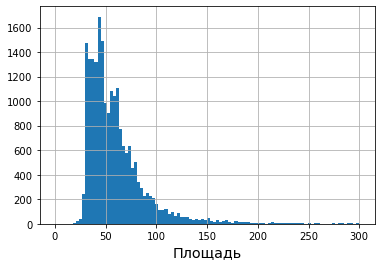

Цена
count     20905.000000
mean       6503.257674
std        9603.551162
min          12.190000
25%        3500.000000
50%        4700.000000
75%        6800.000000
max      420000.000000
Name: last_price, dtype: float64


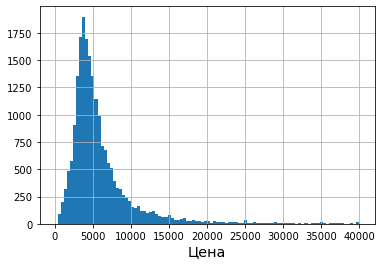

Комнаты
count    20905.000000
mean         2.095288
std          1.064783
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


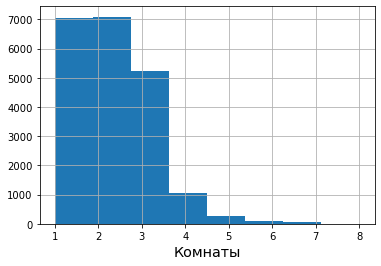

Высота потолков
count    20905.000000
mean         2.723180
std          0.996672
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


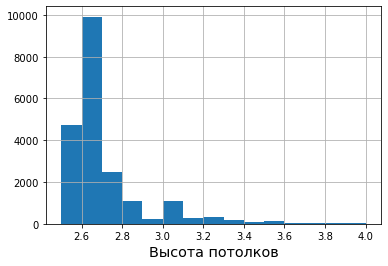

In [37]:
#Построим гистограммы с помощью цикла, для гистограмм возьмем столбцы цену, площадь, кол-во комнат, высоту потолков и время продажи
data_names=['total_area','last_price','rooms','ceiling_height']
data_bins=[100,100,8,15]
data_ranges=[(0,300),(0,40000),(1,8),(2.5,4)]
data_xlabel=['Площадь','Цена','Комнаты','Высота потолков']
i=0
for row in data_names:
    print(data_xlabel[i])
    total_area_data=data[row].hist(bins=data_bins[i],range=data_ranges[i]);
    print(data[row].describe())
    plt.xlabel(data_xlabel[i],fontsize='x-large')
    plt.show()
    i+=1

In [38]:
data['days_exposition'].describe() 
#Среднее время продажи почти в два раза больше медианы

count    18020.000000
mean       185.511099
std        222.037847
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

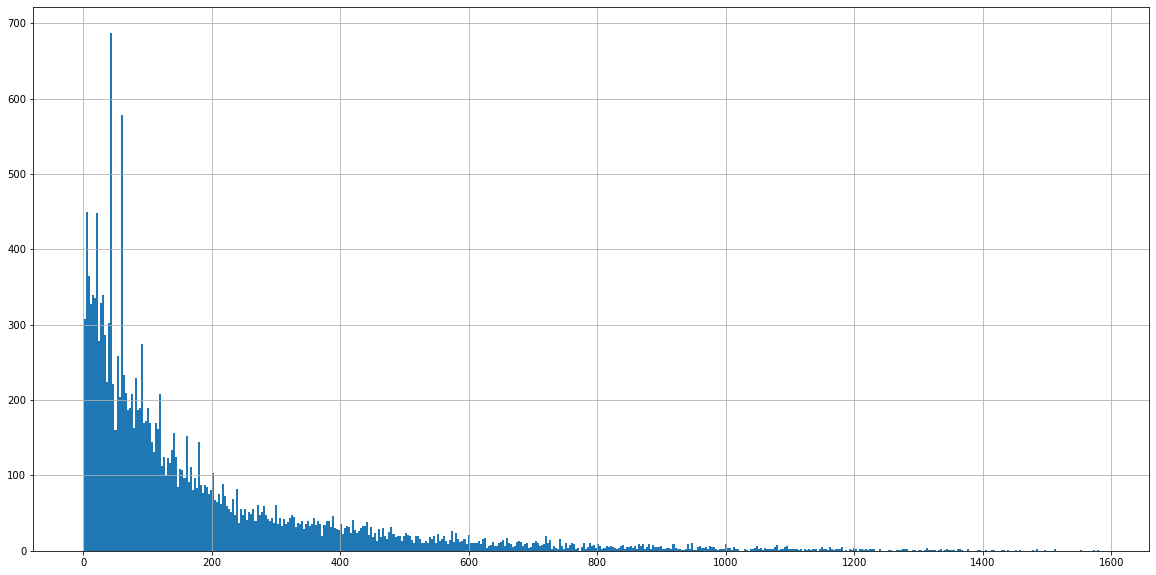

(0.0, 600.0)

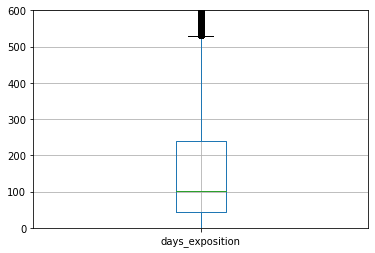

In [39]:
#Построим гистограмму и диаграмму размаха
data['days_exposition'].hist(bins=500, figsize=(20, 10))
plt.show()
data.boxplot(column='days_exposition')
plt.ylim(0,600)

Из графика видим, что медиана тяготеет к низким значениям и составляет 102, т.е. в основном квартиры продаются за 3,5 месяца. Среднее значение значительно выше медианы, что говорит о сильном влиянии выбросов. Верхний ус межквартильного размаха ограничен значением примерно в 550 дней, следовательно квартиры за этой отметкой можно назвать продающимися необычайно долго.

### Проведите исследовательский анализ данных

In [40]:
#создадим новый датафрейм, не учитывающий выбросы и аномалии
data_new = data.query('days_exposition<550 and ceiling_height>2.1 and ceiling_height<4 and rooms<8\
and total_area>25 and total_area<130 and last_price > 300 and last_price < 15000')
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,floor_type,ratio_area,ratio_kitchen,weekday,published_month,published_year
1,7,3350.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок шушары,12817,18603,0,NaN,0,587.0,81.0,82.920792,первый,0.460396,0.272277,1,12,2018
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856,8098,2,112.0,1,48.0,121.0,100.000000,другой,0.320000,0.410000,1,6,2018
5,10,2890.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок янино-1,<NA>,<NA>,<NA>,NaN,<NA>,NaN,55.0,95.065789,другой,0.473684,0.299342,0,9,2018
6,6,3700.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок парголово,52996,19143,0,733.0,0,593.0,155.0,99.195710,другой,0.284182,0.386059,3,11,2017
8,20,2900.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок мурино,<NA>,<NA>,<NA>,NaN,<NA>,NaN,189.0,87.454765,другой,0.465320,0.265682,2,5,2018


Площадь
count    15829.000000
mean        53.730152
std         18.838863
min         25.200000
25%         39.200000
50%         49.300000
75%         64.000000
max        129.800000
Name: total_area, dtype: float64


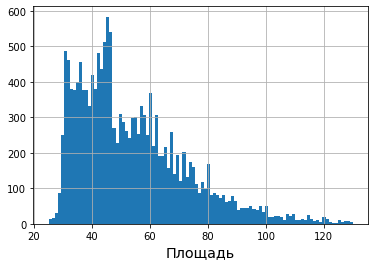

Цена
count    15829.000000
mean      5002.704400
std       2449.276794
min        450.000000
25%       3400.000000
50%       4450.000000
75%       6000.000000
max      14998.000000
Name: last_price, dtype: float64


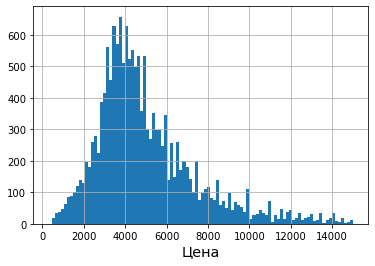

Комнаты
count    15829.000000
mean         1.937520
std          0.882509
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


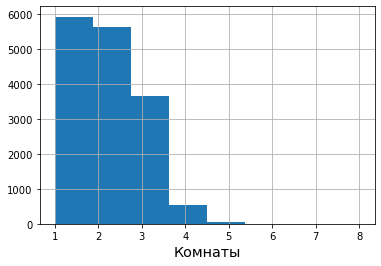

Высота потолков
count    15829.000000
mean         2.670779
std          0.168554
min          2.250000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64


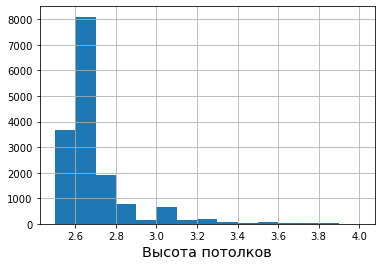

In [41]:
data_bins=[100,100,8,15]
data_ranges_new=[(25,130),(300,15000),(1,8),(2.5,4)]
i=0
for row in data_names:
    print(data_xlabel[i])
    total_area_data=data_new[row].hist(bins=data_bins[i],range=data_ranges_new[i]);
    print(data_new[row].describe())
    plt.xlabel(data_xlabel[i],fontsize='x-large')
    plt.show()
    i+=1

count    15829.000000
mean        53.730152
std         18.838863
min         25.200000
25%         39.200000
50%         49.300000
75%         64.000000
max        129.800000
Name: total_area, dtype: float64


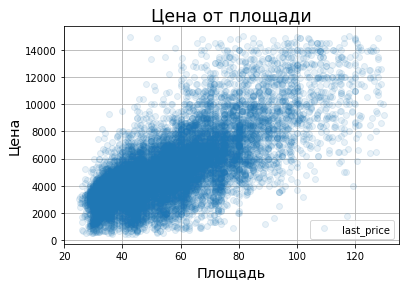

count    15829.000000
mean         1.937520
std          0.882509
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


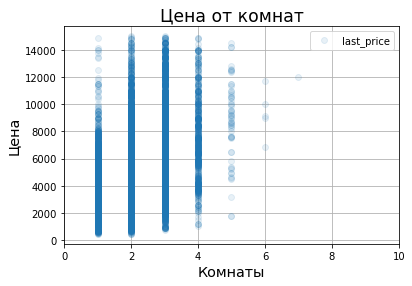

count    12305.000000
mean     14932.010321
std       8451.807423
min        208.000000
25%      10651.000000
50%      13552.000000
75%      16596.000000
max      64857.000000
Name: citycenters_nearest, dtype: float64


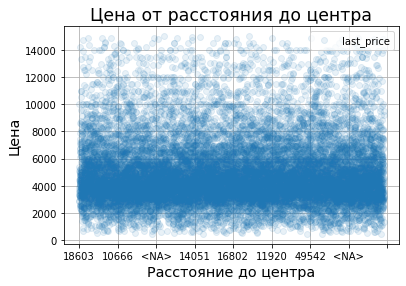

In [42]:
#Построим графики зависимости цены от площади квартиры, количества комнат, удаленности от центра
data_new_names=['total_area','rooms','citycenters_nearest']
data_new_titles=['Цена от площади','Цена от комнат','Цена от расстояния до центра']
data_new_xlabel=["Площадь","Комнаты","Расстояние до центра"]
data_new_end=[]
i=0
for row in data_new_names:   
    k=data_new.plot(x = row, y = 'last_price',style='o',grid=True, alpha = 0.1)
    if row=='rooms':
        plt.xlim(0,10)
    plt.xlabel(data_new_xlabel[i],fontsize='x-large')
    plt.ylabel('Цена',fontsize='x-large')
    plt.title(data_new_titles[i],fontsize='xx-large')
    data_new_end.append(k)
    print(data_new[row].describe())
    plt.show()
    i+=1

In [43]:
#Рассчитаем коэффициент корреляции
data_corr=data_new.loc[:,['last_price','total_area','rooms','citycenters_nearest']].corr()
data_corr

,last_price,total_area,rooms,citycenters_nearest
last_price,1.000000,0.739083,0.465605,-0.355924
total_area,0.739083,1.000000,0.800776,-0.164885
rooms,0.465605,0.800776,1.000000,-0.109620
citycenters_nearest,-0.355924,-0.164885,-0.109620,1.000000


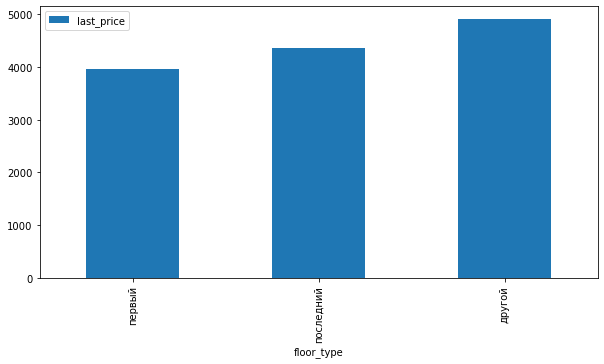

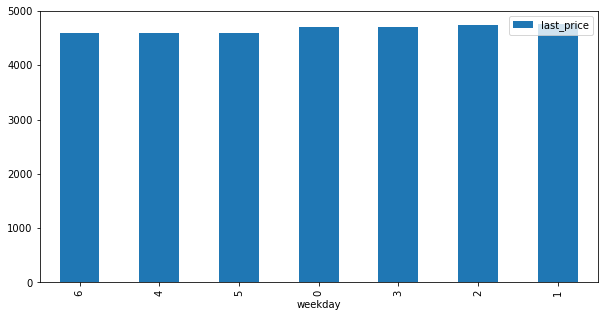

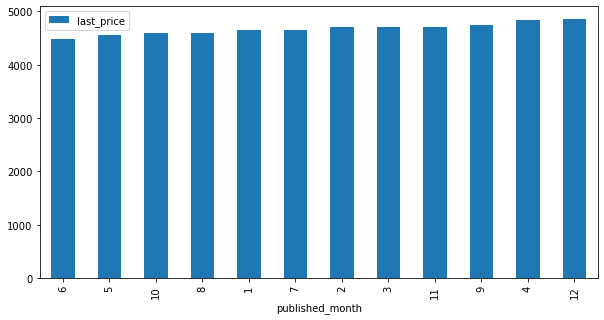

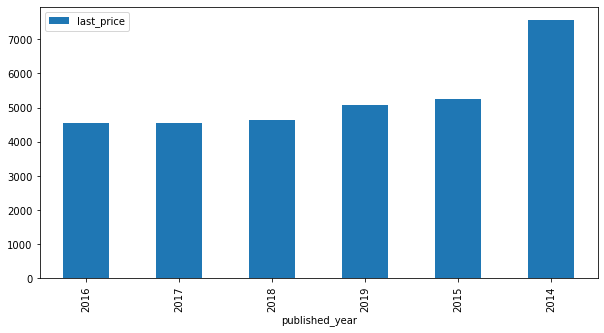

In [44]:
data_list_of_columns = ['floor_type', 'weekday', 'published_month', 'published_year']

for name in data_list_of_columns:
    (data
 .pivot_table(index=name, values='last_price', aggfunc='median')
 .sort_values(by='last_price')
 .plot(y='last_price', kind='bar', figsize=(10, 5))
)

Наименьшая стоимость у квартир на первом этаже. На последнем этаже, также стоимость квартир меньше, чем на других этажах
Какой-либо значимой зависимости цены от дня недели и месяца размещения объявления не наблюдается.
Рассматривая объявления в 2014-2019гг., необходимо отметить пик купли-продажи недвижимости в 2014 году, который,вероятно, был связан с кризисом.

<AxesSubplot:xlabel='locality_name'>

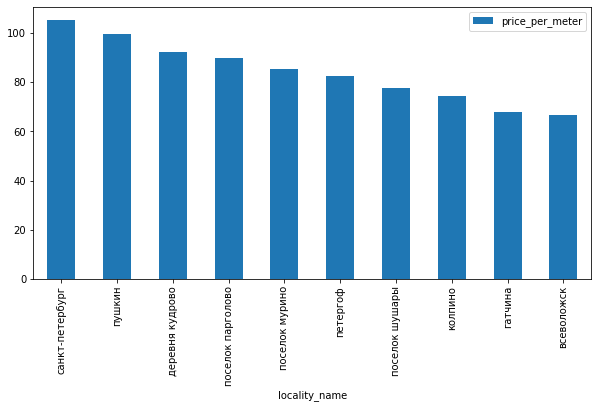

In [45]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений:
(data_new
 # считаем среднюю цену за квадратный метр среди топ-10 населенных пунктов
 .pivot_table(index='locality_name', aggfunc={'last_price':'count', 'price_per_meter':'mean'})
 .sort_values(by='last_price', ascending=False)
 .head(10)
 # отсортируем таблицу еще раз по средним значениям, чтобы выделить минимум и максимум
 .sort_values(by='price_per_meter', ascending=False)
 .plot(y='price_per_meter', kind='bar', figsize=(10, 5))
)

Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая (из топ 10)- во Всеволожске.

,price_per_meter
distance_to_center,
0,189.999466
1,160.719780
2,149.307330
3,124.329484
4,134.862606
5,145.381181
6,149.832976
7,142.516309
8,120.007399


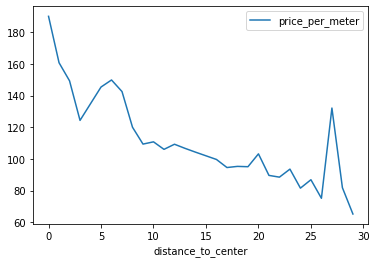

In [46]:
data['citycenters_nearest'] = data['citycenters_nearest'].fillna(0)
data['distance_to_center'] = (data['citycenters_nearest']/1000).astype(int).round(0)
data_spb = data.query('locality_name == "санкт-петербург" and distance_to_center !=999').pivot_table(index = 'distance_to_center', values = 'price_per_meter', aggfunc = 'mean')
data_spb.plot()
data_spb

## Общий вывод

Я проанализировала данные сервиса Яндекс Недвижимость — архив объявлений 2014 - 2019гг о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Стоит отметить большое количество пропусков как в данных, добавленных пользователем, так и в картографических. Высота потолков была заполнена медианным значением. Исходя из предположения, что пользователи не указали данные в виду отсутствия этого признака были заполнены значения в столбцах балкона и апартаментов. Были выявлены и исправлены неявные дубликаты в значениях населенных пунктов. Частично были заполнены пропуски в картографических данных исходя из медианного значения по населенному пункту. В некоторых населенных пунктах данная информация не была указана ни в одном объявлении. Стоит проверить корректность первоначальной базы, возможно данные были утеряны.

Также в таблице были неверно выставлены типы данных, которые, после удаления пропусков, я привела в корректный формат.

Удалила данные с незначительным кол-вом пропусков: в названиях нас. пунктов, кол-ва этажей в доме, а также незаолненные данные жилой площади, т.к. мы не можем достоверно их заменить. 

Добавила необходимые столбцы такие как price_per_meter(цена за квадратный метр), ratio_area(соотношение жилой площади к общей площади), ratio_kitchen(соотношение кухни на общую площадь) и добавила столбцы с днем недели, месяцем и годом публикации. 

Оценив параметры объявлений с помощью гистограмм, я создала сводную таблицу со значения без выбросов и аномалий. Выяснила, что средняя стоимость квартиры составляет 4,5 млн рублей. Средняя площадь квартир составляет 49 квадратных метров, с 2мя комнатами и высотой потолков в 2.65 метра. В среднем объявление были опубликовано на сайте 102 дня.

Оценив таблицу коэффициентов корреляции, можно сделать вывод о высокой зависимости между общей площадью квартиры и её стоимостью (0,74) . Количество комнат и расстояние до центра слабо влияет на окончательную стоимость недвижимости. Наибольшая зависимость прослеживается между количеством комнат и общей площадью квартиры.

Наименьшая стоимость у квартир на первом этаже. На последнем этаже, также стоимость квартир меньше, чем на других этажах Какой-либо значимой зависимости цены от дня недели и месяца размещения объявления не наблюдается. Рассматривая объявления в 2014-2019гг., необходимо отметить пик купли-продажи недвижимости в 2014 году, который, вероятно, был связан с кризисом.

Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая (из топ 10)- во Всеволожске.